# HW3: Softmax Regression (phần 2)

(Cập nhật lần cuối: 02/04/2023)

Họ tên: Hoàng Hữu Minh An

MSSV: 20127102

---

## Nắm cách làm bài và nộp bài

&#9889; Bạn lưu ý là mình sẽ dùng chương trình hỗ trợ chấm bài nên bạn cần phải tuân thủ chính xác qui định mà mình đặt ra, nếu không rõ thì hỏi, chứ không nên tự tiện làm theo ý của cá nhân.

**Cách làm bài**

Bạn sẽ làm trực tiếp trên file notebook này. Đầu tiên, bạn điền họ tên và MSSV vào phần đầu file ở bên trên. Trong file, bạn làm bài ở những chỗ có ghi là:
```python
# YOUR CODE HERE
raise NotImplementedError()
```
hoặc đối với những phần code không bắt buộc thì là:
```python
# YOUR CODE HERE (OPTION)
```
hoặc đối với markdown cell thì là:
```markdown
YOUR ANSWER HERE
```
Tất nhiên, khi làm thì bạn xóa dòng `raise NotImplementedError()` đi.
Đối những phần yêu cầu code thì thường ở ngay phía dưới sẽ có một (hoặc một số) cell chứa các bộ test để phần nào giúp bạn biết đã code đúng hay chưa; nếu chạy cell này không có lỗi gì thì có nghĩa là qua được các bộ test. Trong một số trường hợp, các bộ test có thể sẽ không đầy đủ; nghĩa là, nếu không qua được test thì là code sai, nhưng nếu qua được test thì chưa chắc đã đúng hoàn toàn.

Trong khi làm bài, bạn có thể cho in ra màn hình, tạo thêm các cell để test. Nhưng khi nộp bài thì bạn xóa các cell mà bạn tự tạo, xóa hoặc comment các câu lệnh in ra màn hình. Bạn lưu ý <font color=red>không được tự tiện xóa các cell hay sửa code của Thầy</font> (trừ những chỗ được phép sửa như đã nói ở trên).

Trong khi làm bài, thường xuyên `Ctrl + S` để lưu lại bài làm của bạn, tránh mất mát thông tin.

*Nên nhớ mục tiêu chính ở đây là <font color=green>học, học một cách chân thật</font>.  Bạn có thể thảo luận ý tưởng với bạn khác cũng như tham khảo các nguồn trên mạng, nhưng sau cùng <font color=green>code và bài làm phải là của bạn, dựa trên sự hiểu thật sự của bạn</font> (khi tham khảo các nguồn trên mạng thì bạn cần ghi rõ nguồn trong bài làm, và đương nhiên là bạn cũng không được phép đưa code và bài làm cho bạn khác xem). <font color=red>Nếu vi phạm những điều này thì có thể bạn sẽ bị 0 điểm cho toàn bộ môn học.</font>*

**Cách nộp bài**

Khi chấm bài, đầu tiên mình sẽ chọn `Kernel` - `Restart Kernel & Run All Cells`, để restart và chạy tất cả các cell trong notebook của bạn; do đó, trước khi nộp bài, bạn nên chạy thử `Kernel` - `Restart Kernel & Run All Cells` để đảm bảo mọi chuyện diễn ra đúng như mong đợi.

Sau đó, bạn tạo thư mục nộp bài theo cấu trúc sau:
- Thư mục `MSSV` (vd, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`)
    - File `HW3.ipynb` (không cần nộp các file khác)

Cuối cùng, bạn nén thư mục `MSSV` này lại với định dạng nén là .zip (chứ không được là .rar hay các định dạng khác) và nộp ở link trên moodle. \
<font color=red>Bạn lưu ý tuân thủ chính xác qui định nộp bài này.</font>

## Kiểm tra môi trường code

In [1]:
import sys
sys.executable

'/home/ainz/miniconda3/envs/min_ml-env/bin/python'

Bạn nên thấy kết quả in ra là đường dẫn đến file chạy python của môi trường "min_ml-env" mà mình đã hướng dẫn bạn cài đặt ở HW0.

## Nắm bài toán cần giải quyết của bài tập này

Cho dữ liệu quan sát được (đây là dữ liệu huấn luyện gốc, dữ liệu này thường sẽ được tách ra một phần làm dữ liệu validation): 
$$\{(\textbf{x}^{(1)}, y^{(1)}), ..., (\textbf{x}^{(N_{train})}, y^{(N_{train})})\}$$

Trong đó:

- $\textbf{x}^{(n)} \in \mathbb{R}^{784}$ là véc-tơ đầu vào chứa các giá trị pixel của một ảnh xám $28\times28$, ảnh này là ảnh một chữ số viết tay nào đó (véc-tơ $784$ chiều được tạo từ ảnh xám $28\times28$ bằng cách nối các dòng của ảnh xám lại với nhau)
- $y^{(n)} \in \{0, 1, ..., 9\}$ là đầu ra tương ứng, cho biết đây là chữ số nào

Nhiệm vụ ở đây là tìm ra một mô hình (cùng cách tiền xử lý nếu có) từ dữ liệu này sao cho mô hình này (cùng cách tiền xử lý nếu có) có thể nhận đầu vào là một ảnh-chữ-số-viết-tay *mới* (là một véc-tơ $\in \mathbb{R}^{784}$) và dự đoán đầu ra tương ứng (chữ số nào trong $\{0, 1, 2, ..., 9\}$) một cách *chính xác*.

Bài này sẽ là phần tiếp tục của HW2. Trong bài này, ta sẽ cố gắng cải tiến hơn nữa cách tiền xử lý + mô hình Softmax Regression.

## Import các thư viện cần thiết

In [2]:
import numpy as np
import os
import pickle
import gzip
import matplotlib.pyplot as plt
plt.style.use('ggplot') # Để hình vẽ đẹp hơn một xíu ...

Lưu ý: khi tính toán với mảng Numpy, bạn nên dùng các toán-tử/hàm/phương-thức mà Numpy đã cũng cung cấp sẵn. Các toán-tử/hàm/phương-thức này làm trên nguyên mảng và ở bên dưới đã được tối ưu hóa; do đó, code sẽ ngắn gọn và chạy nhanh. Nếu bạn dùng vòng lặp for và làm với từng phần tử của mảng Numpy thì code sẽ dài và chạy chậm $\to$ bạn sẽ bị trừ điểm.

## Đọc dữ liệu (giống HW2)

Bộ dữ liệu mà ta sẽ dùng trong bài này là MNIST - bộ dữ liệu chữ số viết tay "nổi tiếng" trong cộng đồng làm Machine Learning. [Bộ MNIST gốc](http://yann.lecun.com/exdb/mnist/) gồm có: dữ liệu huấn luyện (60000 ảnh) và dữ liệu kiểm tra (10000 ảnh). Bộ MNIST mà ta sẽ dùng trong bài này (file "mnist.pkl.gz") gồm có: dữ liệu huấn luyện (50000 ảnh), dữ liệu validation (10000 ảnh), và dữ liệu kiểm tra (10000 ảnh); dữ liệu huấn luyện và validation ở đây được tạo ra bằng cách tách dữ luyện huấn luyện gốc ra thành 2 phần theo tỉ lệ 5:1. 

Về mặt ý nghĩa thì dữ liệu validation và dữ liệu kiểm tra đều là dữ liệu mới ngoài dữ liệu huấn luyện. Dữ liệu validation giống như đề thi thử, có thể được thi một vài lần; còn dữ liệu kiểm tra giống như đề thi thật, để đảm bảo kết quả được khách quan thì chỉ được thi một lần duy nhất! Khi làm Machine Learning, ta thường muốn thử một số cách tiền xử lý + mô hình để chọn ra cách tiền xử lý + mô hình tốt nhất. Với mỗi cách tiền xử lý + mô hình, ta sẽ huấn luyện trên dữ liệu huấn luyện và đo độ lỗi dự đoán trên dữ liệu validation; cuối cùng ta sẽ chọn cách tiền xử lý + mô hình mà có độ lỗi dự đoán thấp nhất trên dữ liệu validation (ta không chọn dựa vào độ lỗi dự đoán trên dữ liệu huấn luyện vì có thể xảy ra trường hợp "học vẹt": cách tiền xử lý + mô hình có độ lỗi rất thấp trên dữ liệu huấn luyện nhưng lại có độ lỗi cao với dữ liệu mới ngoài dữ liệu huấn luyện). Khi đã chọn xong cách tiền xử lý + mô hình rồi thì ta sẽ đo một lần duy nhất độ lỗi dự đoán trên dữ liệu kiểm tra để có một ước lượng khách quan về độ lỗi thật sự! Nếu bạn nhìn vào độ lỗi dự đoán trên dữ liệu kiểm tra và quay lại điều chỉnh cách tiền xử lý + mô hình thì kết quả trên dữ liệu kiểm tra sẽ không còn sự khách quan nữa!

Đoạn code dưới đây sẽ đọc dữ liệu từ file "mnist.pkl.gz" và lưu kết quả vào 6 mảng:

- `train_X`, `train_y`
- `val_X`, `val_y`
- `test_X`, `test_y`

In [3]:
def read_mnist(mnist_file):
    if os.path.isfile(mnist_file) == False:
        mnist_file = os.path.join(os.path.expanduser('~/NMHM/'), 'data', 'mnist.pkl.gz')
    
    f = gzip.open(mnist_file, 'rb')
    train_data, val_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    
    train_X, train_Y = train_data
    val_X, val_Y = val_data
    test_X, test_Y = test_data    
    
    return train_X, train_Y, val_X, val_Y, test_X, test_Y

# Bạn cần đặt file "mnist.pkl.gz" vào cùng thư mục với file notebook này,
# hoặc bạn cũng có thể đặt ở thư mục tương ứng với câu lệnh này:
# os.path.join(os.path.expanduser('~'), 'data')
train_X, train_y, val_X, val_y, test_X, test_y = read_mnist('mnist.pkl.gz')
print(f'Shape of train_X: {train_X.shape}, shape of train_y: {train_y.shape}')
print(f'Shape of val_X:   {val_X.shape}, shape of val_y:   {val_y.shape}')
print(f'Shape of test_X:  {test_X.shape}, shape of test_y:  {test_y.shape}')

Shape of train_X: (50000, 784), shape of train_y: (50000,)
Shape of val_X:   (10000, 784), shape of val_y:   (10000,)
Shape of test_X:  (10000, 784), shape of test_y:  (10000,)


## Khám phá dữ liệu huấn luyện (giống HW2)

Đầu tiên, ta hãy xem thử min và max của `train_X`.

In [4]:
print(f'Min of train_X: {train_X.min()}, max of train_X: {train_X.max()}')

Min of train_X: 0.0, max of train_X: 0.99609375


Với ảnh xám thì giá trị của mỗi pixel thường sẽ nằm trong đoạn [0, 255] (với 0 là màu đen và 255 là màu trắng), hoặc đôi khi được chuẩn hóa về đoạn [0, 1] (với 0 là màu đen và 1 là màu trắng). Ở đây có vẻ giá trị pixel của ảnh xám của ta nằm trong đoạn [0, 1].

Tiếp theo, ta hãy thử xem mặt mũi của vài ảnh trong `train_X`.

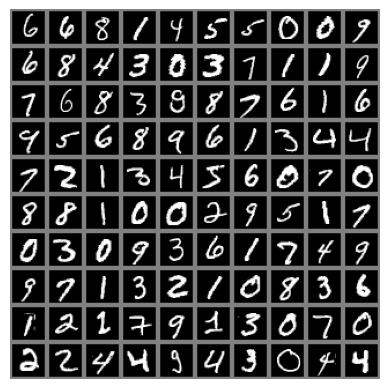

In [5]:
# Bạn có thể chạy cell này nhiều lần để xem các ảnh ngẫu nhiên khác nhau
n_rimages = 10; n_cimages = 10 
padding = 2 
canvas = 0.5 * np.ones((n_rimages * (28 + 2 * padding), n_cimages * (28 + 2 * padding)))
rand_idxs = np.random.permutation(np.arange(len(train_X))[:n_rimages * n_cimages])
for r in range(n_rimages):
    for c in range(n_cimages):
        i = r * n_cimages + c
        image = train_X[rand_idxs[i]].reshape(28, 28)
        temp1 = r * (28 + 2 * padding) + padding 
        temp2 = c * (28 + 2 * padding) + padding 
        canvas[temp1:temp1 + 28, temp2:temp2 + 28] = image
plt.imshow(canvas, cmap='gray', vmin=0, vmax=1)
plt.axis('off');

Tiếp theo, ta hãy xem các giá trị có thể có của `train_y` và số lượng của mỗi giá trị này.

In [6]:
values, counts = np.unique(train_y, return_counts=True)
for value, count in zip(values, counts):
    print(f'Value: {value}, count: {count}')

Value: 0, count: 4932
Value: 1, count: 5678
Value: 2, count: 4968
Value: 3, count: 5101
Value: 4, count: 4859
Value: 5, count: 4506
Value: 6, count: 4951
Value: 7, count: 5175
Value: 8, count: 4842
Value: 9, count: 4988


Như vậy là `train_y` có 10 giá trị có thể có ứng với 10 chữ số từ 0 đến 9. Và số lượng ảnh của mỗi chữ số cũng khá tương đương nhau. Tốt ...

## Đưa ra ý tưởng cải tiến

Ở phần cải tiến của HW2, mình đã có nói về 2 ý tưởng mà có thể giúp làm giảm độ lỗi trên dữ liệu huấn luyện với hy vọng là khi độ lỗi trên dữ liệu huấn luyện giảm xuống thì độ lỗi trên dữ liệu mới ngoài dữ liệu huấn luyện cũng sẽ giảm theo.

- Ý tưởng 1 (liên quan đến việc huấn luyện mô hình Softmax Regression): Thực hiện tốt hơn nữa việc cực tiểu hóa độ lỗi trên dữ liệu huấn luyện của mô hình Softmax Regression
- Ý tưởng 2 (liên quan đến việc tiền xử lý): Suy nghĩ để đưa ra véc-tơ đầu vào $\textbf{z}$ thay cho véc-tơ đầu vào $\textbf{x}$ sao cho $\textbf{z}$ sẽ giúp mô hình Softmax Regression --- một mô hình có "đầu óc đơn giản" --- dự đoán đầu ra $y$ dễ hơn so với $\textbf{x}$

Ở HW2, với ý tưởng 1 thì mình mới chỉ nói một cách là nói máy tính cố chịu đựng và tăng thêm số lượng vòng lặp của thuật toán Gradient Descent :-(. Với ý tưởng 2 thì mình đã đưa ra một cách đơn giản: $\textbf{z}$ sẽ là $\textbf{x}$ (chứa các giá trị pixel) được bổ sung thêm 2 đặc trưng là "intensity" và "symmetry"; bạn cũng đã cài đặt cách đơn giản này và kết quả cho thấy độ lỗi được cải thiện, dù không ấn tượng gì mấy.

Trong bài này thì ta sẽ tiếp tục theo đuổi 2 ý tưởng ở trên. Dưới đây thì đầu tiên ta sẽ làm với ý tưởng 1. Cụ thể thì ta sẽ thử cài đặt một cải tiến đơn giản của thuật toán Gradient Descent (GD) gọi là Stochastic Gradient Descent (SGD) mà có thể giúp tăng tốc một cách đáng kể; từ đó, với cùng một khoảng thời gian, SGD có thể giúp đạt được độ lỗi trên dữ liệu huấn luyện nhỏ hơn nhiều so với GD. Độ lỗi trên dữ liệu huấn luyện mà cần cực tiểu hóa của một mô hình machine learning thường có dạng trung bình của độ lỗi của một mẫu dữ liệu huấn luyện $(\textbf{x}, y)$. Do đó, gradient (các đạo hàm riêng) của độ lỗi trên dữ liệu huấn luyện theo bộ trọng số sẽ có dạng trung bình của gradient của độ lỗi của một mẫu dữ liệu huấn luyện. Nghĩa là, ở mỗi lần cập nhật trọng số, để tính gradient của độ lỗi trên dữ liệu huấn luyện, GD sẽ phải duyệt qua tất cả các mẫu dữ liệu huấn luyện, với mỗi mẫu tính gradient, rồi cuối cùng lấy trung bình lại (ở HW2, khi cài đặt bằng Numpy, bạn dùng các toán-tử/hàm/phương-thức của Numpy chứ không cài đặt việc duyệt qua các mẫu dữ liệu huấn luyện một cách tường minh, nhưng bên dưới vẫn sẽ xảy ra việc duyệt này). Do đó, nếu có nhiều mẫu dữ liệu huấn luyện thì GD sẽ chạy chậm. SGD tăng tốc bằng cách: dùng gradient trung bình trên một mini-batch --- một tập con ngẫu nhiên các mẫu dữ liệu huấn luyện --- để xấp xỉ gradient trung bình trên toàn bộ các mẫu dữ liệu huấn luyện. 

Cụ thể, SGD thường được cài đặt như sau:

===

Với mỗi epoch (một epoch ám chỉ một lần duyệt qua toàn bộ các mẫu dữ liệu huấn luyện):
- Xáo trộn ngẫu nhiên các mẫu dữ liệu huấn luyện
- Chia các mẫu dữ liệu huấn luyện ra thành các mini-batch có kích thước bằng nhau (kích thước này do người dùng chỉ định). Với mỗi mini-batch:
    - Tính gradient trung bình trên mini-batch
    - Cập nhật trọng số: trọng số mới = trọng số cũ - learning rate * gradient

===

Giả sử ta có 100 mẫu dữ liệu huấn luyện và kích thước của mini-batch là 20. Với một epoch (một lần duyệt qua toàn bộ các mẫu dữ liệu huấn luyện), GD chỉ đi được một bước (tức một lần cập nhật trọng số), còn SGD sẽ đi được 100/20 = 5 bước. Mặc dù chất lượng một bước đi của SGD không bằng GD nhưng khi chạy SGD và GD trong thực tế thì người ta thấy số lượng hơn chất lượng: sau một epoch, độ lỗi của SGD thường thấp hơn nhiều so với độ lỗi của GD! 

Dưới đây, khi làm với ý tưởng 1 (thay GD bằng SGD) thì ta sẽ giữ nguyên véc-tơ đầu vào $\textbf{x}$, chỉ tiền xử lý là thêm 1 ở đầu.

## Tiền xử lý dữ liệu huấn luyện

In [7]:
def add_ones(X):
    return np.hstack((np.ones((len(X), 1)), X))

# Gọi hàm add_ones để tiền xử lý train_X
train_Z = add_ones(train_X)
train_Z.shape

(50000, 785)

## Tìm mô hình Softmax Regression từ dữ liệu huấn luyện

Nhiệm vụ 1 của bạn (không có điểm nhưng cần làm để có thể sang nhiệm vụ 2): viết các hàm phụ trợ cho hàm `train_smreg`, trong đó có 2 hàm bắt buộc là hàm `compute_smreg_output` và `compute_mbe` (ta không chỉ dùng 2 hàm này bên trong hàm `train_smreg` mà lúc sau cũng sẽ dùng bên ngoài hàm `train_smreg`). Bạn đã viết hai hàm này ở HW2, giờ chỉ cần chép và dán qua là xong.

In [19]:
def compute_smreg_output(W, X, return_prob=True):
    # YOUR CODE HERE
    z = np.matmul(X, W) # core function 
    
    # soft max
    exp_z = np.exp(z)
    P = exp_z / np.sum(exp_z, axis= 1).reshape(-1,1)

    # return
    if(not return_prob): return np.argmax(P, axis= 1)
    return P

def compute_mbe(predicted_y, y):
    # YOUR CODE HERE
    # Tính trung bình của các phần tử khác nhau giữa predicted_y và y
    error = np.mean(predicted_y != y)
    
    # Chuyển đổi thành phần trăm
    mbe = error * 100
    return mbe

In [20]:
# Ngoài hàm compute_smreg_output và compute_mbe, nếu muốn thì bạn có thể viết 
# thêm các hàm phụ trợ khác cho hàm train_smreg
# YOUR CODE HERE (OPTION)ư\
def to_one_hot(y):
    one_hot_matrix = np.zeros((y.shape[0], np.unique(y).max() + 1))
    one_hot_matrix[np.arange(y.shape[0]), y] = 1

    return one_hot_matrix

Sau khi xong nhiệm vụ 1 thì bây giờ bạn sẽ sang nhiệm vụ 2 và cũng là nhiệm vụ chính của bạn (3đ): viết hàm `train_smreg` để huấn luyện mô hình Softmax Regression bằng thuật toán SGD (mình đã mô tả mã giả của thuật toán SGD ở bên trên).

Hàm `train_smreg` có các tham số đầu vào:
- `X`, `y`, `lr`, `max_epoch`, `initial_W`: giống như ở HW2, mình sẽ không nhắc lại nữa
- `mb_size`: số nguyên thuộc đoạn [1, số-lượng-mẫu-dữ-liệu-huấn-luyện] cho biết kích thước của mini-batch; nếu `mb_size` bằng số lượng mẫu dữ liệu huấn luyện thì SGD sẽ trở thành GD!
- `wanted_mbe`: số thực thuộc đoạn [0, 100] cho biết độ lỗi MBE trên dữ liệu huấn luyện mà ta muốn đạt tới; ta sẽ dừng SGD khi số lượng epoch bằng `max_epoch` hoặc độ lỗi MBE trên dữ liệu huấn luyện (được tính sau mỗi epoch) nhỏ hơn hoặc bằng `wanted_mbe`; ở bài này, ta dùng tham số này để so sánh GD và SGD: với cùng một giá trị `wanted_mbe`, ta sẽ so sánh thời gian chạy của GD và SGD (còn nếu ta so sánh GD và SGD bằng cách so sánh độ lỗi của GD và SGD với cùng `max_epoch` thì có thể sẽ không được công bằng cho lắm, vì một epoch của SGD có vẻ sẽ tốn nhiều thời gian hơn so với một epoch của GD)

Hàm `train_smreg` trả về 2 thứ như ở HW2: mảng chứa các trọng số tìm được của mô hình Softmax Regression, và list chứa độ lỗi cross-entropy trên dữ liệu huấn luyện sau mỗi epoch.

Một số thống nhất khi cài đặt hàm `train_smreg`:

- Bạn cài đặt bước "xáo trộn ngẫu nhiên các mẫu dữ liệu huấn luyện" như sau: trước khi đi vào các epoch thì bạn tạo một mảng chứa các chỉ số 0, 1, ..., số-lượng-mẫu-dữ-liệu-huấn-luyện - 1; ở mỗi epoch thì bạn xáo trộn ngẫu nhiên mảng các chỉ số này bằng hàm `np.random.shuffle(mảng-các-chỉ-số)`, và dùng `mb_size` chỉ số đầu tiên để lấy ra mini-batch thứ nhất, dùng `mb_size` chỉ số tiếp theo để lấy ra mini-batch thứ hai, ...
- Trong trường hợp số-lượng-mẫu-dữ liệu-huấn-luyện chia cho `mb_size` bị lẻ thì bạn sẽ không dùng phần dữ liệu bị lẻ ở cuối

In [21]:
def train_smreg(X, y, initial_W, mb_size, lr, max_epoch, wanted_mbe):
    np.random.seed(0) # Cố định sự ngẫu nhiên để mình và bạn sẽ ra cùng kết quả

    if initial_W is None: 
        initial_W  = np.zeros((X.shape[1], np.max(y).max() + 1))

    #  Tạo mảng chứa các chỉ số:
    indexs = np.arange(X.shape[0])
    CE = list()
    W = initial_W

    # chuyển về dạng one hot 
    ONE_HOT = to_one_hot(y)

    for i in range(max_epoch):

        # Xáo trộn các chỉ số
        np.random.shuffle(indexs)
        # Dữ liệu bị lẻ
        n_mb = X.shape[0] // mb_size
        if X.shape[0] % mb_size != 0: indexs = indexs[:n_mb * mb_size]
        # Tách batch cho mỗi epoch
        mini_batches = np.array_split(indexs, n_mb)

        for idx in mini_batches:
            X_mb, ONE_HOT_mb = X[idx], ONE_HOT[idx]
            
            # Dự đoán đầu ra cho mỗi mini-batch
            P_mb = compute_smreg_output(W, X_mb)
            
            # Tính trung bình grad của mỗi mini batch
            # 785x32 @ (32x10 - 32x10) / 32
            grad = np.matmul(X_mb.T, (P_mb - ONE_HOT_mb)) / mb_size # ???
            
            # Cập nhật trọng số => số lần cập nhật là len(mini_batches)
            W -= lr*grad
            
        # cross entropy
        P = compute_smreg_output(W, X)
        CE.append(-np.sum(np.log(P) * ONE_HOT) / X.shape[0])

        # mbe
        predict_y = np.argmax(P, axis= 1)
        mbe = compute_mbe(predict_y, y)

        if mbe <= wanted_mbe:
            break

    return W, CE


In [22]:
# TEST
W, ces = train_smreg(
    train_Z, train_y, 
    initial_W=None, mb_size=32, lr=0.03, max_epoch=1, wanted_mbe=0)
assert W.shape == (785, 10)
assert str(W[0, 0].round(4)) == '-0.0997'
assert len(ces) == 1
assert str(np.round(ces[0], 4)) == '0.4044'

W, ces = train_smreg(
    train_Z, train_y, 
    initial_W=W, mb_size=32, lr=0.03, max_epoch=1000, wanted_mbe=20)
assert W.shape == (785, 10)
assert str(W[0, 0].round(4)) == '-0.1398'
assert len(ces) == 1
assert str(np.round(ces[0], 4)) == '0.3556'

Ở trên, ta chỉ test nhỏ nhỏ để có thể nhanh chóng kiểm tra tính đúng đắn của hàm `train_smreg`. Bây giờ ta mới làm thật. Đầu tiên, ta sẽ so sánh GD và SGD bằng cách: cho `wanted_mbe` bằng 10 (còn `max_epoch` thì thật lớn) và so sánh thời gian chạy của hàm `train_smreg` với `mb_size` bằng `len(train_Z)` (GD) và thời gian chạy của hàm `train_smreg` với `mb_size` bằng 32 (SGD). Với GD thì ta dùng `lr` bằng 0.3 (`lr` tốt nhất trong 3 giá trị [0.03, 0.3, 1] mà ta đã thử ở HW2), với SGD thì ta sẽ dùng `lr` bằng 0.03 (mình có thử `lr` bằng 0.3 thì thấy độ lỗi của SGD lúc lên lúc xuống nên mình hạ xuống 0.03 và thấy mọi chuyện diễn ra tốt đẹp, mình nghĩ việc SGD có `lr`-phù-hợp thấp hơn `GD` cũng hợp lý, vì chất lượng một bước đi của SGD không bằng GD). Ngoài ra, để nhanh chóng đo thời gian chạy của một cell thì ta sẽ dùng câu lệnh magic `%%time` của Jupyter Notebook ở đầu cell. 

In [23]:
%%time
W_3a, train_ces = train_smreg(
    train_Z, train_y, 
    initial_W=None, mb_size=len(train_Z), lr=0.3, max_epoch=1000, wanted_mbe=10)

plt.plot(np.log(train_ces))
plt.xlabel('Epoch')
plt.ylabel('Log (for clarity) of training cross-entropy');

KeyboardInterrupt: 

Chắc đi uống coffee cái đã ...

Phù, cuối cùng GD cũng chạy xong, gần 300 epoch ... Bên máy mình mất gần 1 phút.

Bây giờ ta hãy xem SGD.

CPU times: user 4.44 s, sys: 1.06 s, total: 5.5 s
Wall time: 1.19 s


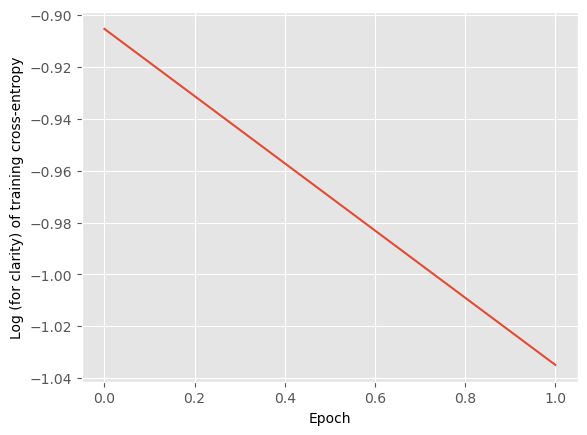

In [ ]:
%%time
W_3b, train_ces = train_smreg(
    train_Z, train_y, 
    initial_W=None, mb_size=32, lr=0.03, max_epoch=1000, wanted_mbe=10)

plt.plot(np.log(train_ces))
plt.xlabel('Epoch')
plt.ylabel('Log (for clarity) of training cross-entropy');

Bùm, xong! SGD chỉ tốn 2 epoch! Bên máy mình chạy chưa đến 1 giây!

Bây giờ ta đã hoàn toàn bị thuyết phục là SGD tốt hơn nhiều so với GD (ít nhất là với dữ liệu mà ta đang làm, khi mà số lượng mẫu dữ liệu huấn luyện tương đối lớn). Tiếp theo, ta sẽ chạy tiếp SGD từ bộ trọng số đã tìm được trước đó với `max_epoch` bằng 98 (kết hợp với 2 epoch trước đó thì tổng cộng sẽ là 100 epoch), còn `wanted_mbe` thì ta sẽ cho bằng 0 để SGD sẽ bị ngắt bởi `max_epoch` trước.

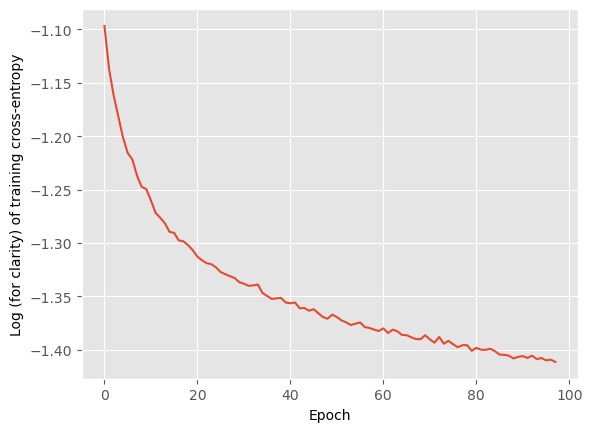

In [ ]:
W_3, train_ces = train_smreg(
    train_Z, train_y, 
    initial_W=W_3b, mb_size=32, lr=0.03, max_epoch=98, wanted_mbe=0)

plt.plot(np.log(train_ces))
plt.xlabel('Epoch')
plt.ylabel('Log (for clarity) of training cross-entropy');

Mình có chạy thử thêm mấy trăm epoch nữa thì thấy độ lỗi vẫn tiếp tục giảm nhưng không nhiều. Do đó, mình nghĩ trong bài này thì có thể dừng ở đây và cho rằng việc cực tiểu hóa độ lỗi trên dữ liệu huấn luyện của mô hình Softmax Regression đã khá ổn.

## Dùng mô hình Softmax Regression tìm được để dự đoán với dữ liệu huấn luyện và đánh giá kết quả

In [ ]:
predicted_train_y = compute_smreg_output(W_3, train_Z, return_prob=False)
train_mbe = compute_mbe(predicted_train_y, train_y)
print(train_mbe)
assert str(np.round(train_mbe, 4)) == '6.744'

6.755999999999999


AssertionError: 

Ở HW2, khi dùng GD, độ lỗi MBE trên dữ liệu huấn luyện chỉ được 9.x% (mặc dù máy tính của ta cũng đã phải chạy khá vật vả với 500 epoch). Với SGD, chỉ với 100 epoch, ta đã đạt được độ lỗi 6.x!

## Tiền xử lý dữ liệu validation, dùng mô hình Softmax Regression tìm được để dự đoán với dữ liệu validation và đánh giá kết quả

In [ ]:
val_Z = add_ones(val_X)
predicted_val_y = compute_smreg_output(W_3, val_Z, return_prob=False)
val_mbe = compute_mbe(predicted_val_y, val_y)
print(val_mbe)
assert str(np.round(val_mbe, 4)) == '7.03'

7.1


AssertionError: 

Độ lỗi MBE trên dữ liệu validation cũng giảm theo: từ 8.x% ở HW2 xuống 7.x%!

## Đưa ra ý tưởng cải tiến

Đến đây, ta đã khai thác khá triệt để ý tưởng 1: việc cực tiểu hóa độ lỗi trên dữ liệu huấn luyện của mô hình Softmax Regression đã khá ổn. Để có thể cải tiến hơn nữa thì ta sẽ qua ý tưởng 2: suy nghĩ để đưa ra véc-tơ đầu vào $\textbf{z}$ thay cho véc-tơ đầu vào $\textbf{x}$ sao cho $\textbf{z}$ sẽ giúp mô hình Softmax Regression --- một mô hình có "đầu óc đơn giản" --- dự đoán đầu ra $y$ dễ hơn so với $\textbf{x}$. Có thể nói là ý tưởng 2 này gần như là không có giới hạn, ta luôn luôn có thể khai thác hơn nữa ý tưởng 2 này, và khi khai thác tốt thì ta sẽ có một mô hình nhẹ, đơn giản, nhưng lại có độ chính xác dự đoán cao!

Đầu tiên, ta hãy quan sát các ảnh của một chữ số nào đó, chẳng hạn chữ số 8.


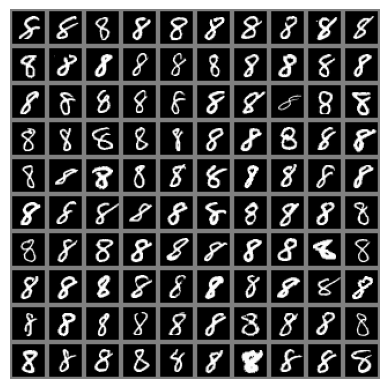

In [ ]:
X = train_X[train_y == 8] 

n_rimages = 10; n_cimages = 10 
padding = 2 
canvas = 0.5 * np.ones((n_rimages * (28 + 2 * padding), n_cimages * (28 + 2 * padding)))
rand_idxs = np.random.permutation(np.arange(len(train_X))[:n_rimages * n_cimages])
for r in range(n_rimages):
    for c in range(n_cimages):
        i = r * n_cimages + c
        image = X[rand_idxs[i]].reshape(28, 28)
        temp1 = r * (28 + 2 * padding) + padding 
        temp2 = c * (28 + 2 * padding) + padding 
        canvas[temp1:temp1 + 28, temp2:temp2 + 28] = image
plt.imshow(canvas, cmap='gray', vmin=0, vmax=1)
plt.axis('off');

Ta thấy một yếu tố làm cho các ảnh chữ số 8 khác nhau là độ nghiêng (khi viết, có người theo phong cách viết đứng, có người viết nghiêng ít, có người viết nghiêng nhiều, ...). Điều này cũng đúng cho các ảnh của các chữ số khác. Nếu ta dùng véc-tơ đầu vào $\textbf{z}$ là ảnh đã được loại bỏ độ nghiêng (tức viết đứng) thay cho véc-tơ đầu vào $\textbf{x}$ là ảnh ban đầu thì có thể sẽ giúp mô hình Softmax Regression dễ dàng hơn trong việc dự đoán đây là chữ số nào.

Từ ảnh ban đầu, làm sao để tạo ra ảnh được loại bỏ độ nghiêng? Ý tưởng thực hiện được phác họa ở hình bên dưới. 

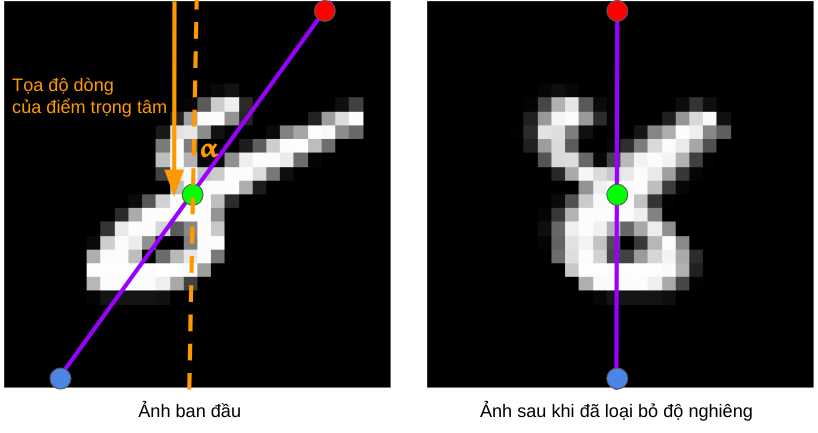

Đầu tiên, từ ảnh ban đầu, ta sẽ tìm đường thẳng thể hiện cho độ nghiêng của chữ số (đường màu tím) và điểm trọng tâm của chữ số (điểm màu xanh lá). Kế tiếp, ta sẽ thay đổi tọa độ cột của các pixel (còn tọa độ dòng thì giữ nguyên) sao cho: đường thẳng thể hiện độ nghiêng của chữ số sẽ không còn nghiêng nữa, còn tọa độ của điểm trọng tâm của chữ số thì vẫn sẽ được giữ nguyên (để bạn dễ hình dung sự thay đổi, ngoài điểm trọng tâm màu xanh lá, mình có vẽ thêm điểm màu đỏ và điểm màu xanh dương). Nếu gọi `O` là ma trận pixel của ảnh sau khi đã loại bỏ độ nghiêng và `I` là ma trận pixel của ảnh ban đầu thì câu hỏi đặt ra là: `O[r, c] = I[r, ?]` (ở đây `r` và `c` là tọa độ dòng và cột của một pixel trong ảnh sau khi đã loại bỏ độ nghiêng). Quan sát sự thay đổi của 3 điểm màu đỏ, xanh lá cây, xanh dương thì ta có thể thấy rằng: \
`O[r, c] = I[r, ic]` \
với `ic = c + (tọa-độ-dòng-của-điểm-trọng-tâm - r)*tan-của-alpha` \
(alpha là góc hợp bởi đường thẳng thể hiện độ nghiêng với phương thẳng đứng)\
Nếu bạn chưa hiểu công thức này thì bạn nên dành chút thời gian để nghiền ngẫm ...

Ở trên là ý tưởng chính để có thể tạo ra ảnh được loại bỏ độ nghiêng từ ảnh ban đầu. Bây giờ, ta sẽ nói về các chi tiết. Đầu tiên, ta sẽ nói về công thức tính `O[r, c]` ở trên. Với công thức tính `ic` ở trên thì `ic` có thể ra số không nguyên. Trong trường hợp này, ta sẽ tính `O[r, c]` như sau: \
`O[r, c] = con*I[r, ic-được-làm-tròn-xuống] + (1 - con)*I[r, ic-được-làm-tròn-lên]` \
với `con` (contribution) là trọng số thuộc đoạn [0, 1] cho biết mức độ đóng góp của `I[r, ic-được-làm-tròn-xuống]`, cụ thể thì `con = ic-được-làm-tròn-lên - ic`. \
Công thức tính `O[r,c]` này cũng sẽ vẫn đúng với trường hợp `ic` là số nguyên nên ta có thể xem đây là một công thức tổng quát. Tuy nhiên, vẫn còn một vấn đề nữa là `ic` có thể bị văng ra ngoài miền giá trị hợp lệ của chỉ số cột (ở đây, miền giá trị hợp lệ là đoạn [0, 27]), và do đó `ic`-được-làm-tròn-lên/xuống cũng có thể bị văng ra ngoài miền giá trị hợp lệ. Nếu vấn đề này xảy ra thì ta sẽ tinh chỉnh lại `ic`-được-làm-tròn-lên/xuống bằng cách lấy giá trị hợp lệ gần nhất (nếu < 0 thì lấy 0, nếu > 27 thì lấy 27).

Một chi tiết cuối cùng mà ta cần nói là cách tìm đường thẳng thể hiện độ nghiêng của chữ số và điểm trọng tâm của chữ số, để từ đó có thể tính `ir` (thật ra là ta chỉ cần tìm tan của góc alpha và tọa độ dòng của điểm trọng tâm). Cách tìm 2 thứ này được phác họa ở hình bên dưới.

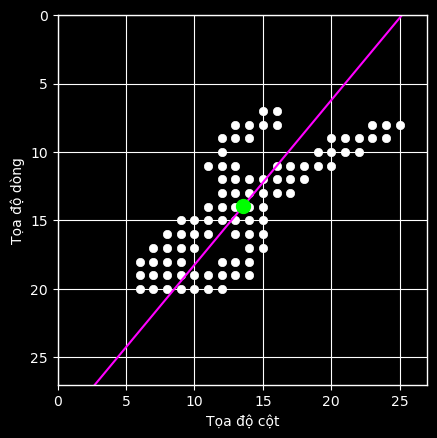

Trong hệ trục tọa độ dòng & cột (gốc tọa độ là ở góc trái trên), ta sẽ có các điểm dữ liệu màu trắng là tọa độ dòng và cột của các pixel của chữ số (chứ không phải của background). Ở đây, ta thống nhất: nếu giá trị pixel > 0.5 thì ta sẽ xem đây là pixel của chữ số. Tọa độ dòng và cột của điểm trọng tâm màu xanh chính là trung bình tọa độ dòng và cột của các điểm dữ liệu màu trắng! Còn đường thẳng màu tím thể hiện cho độ nghiêng chính là đường thẳng hồi qui có phương trình tọa-độ-cột = a * tọa-độ-dòng + b mà khớp nhất với các điểm dữ liệu màu trắng! (Nói thêm: mình có thử dùng đường thẳng có phương trình tọa-độ-dòng = a * tọa-độ-cột + b thì thấy đường tìm được không tốt bằng so với đường có phương trình tọa-độ-cột = a * tọa-độ-dòng + b). Tan của góc alpha mà ta cần tìm sẽ bằng -a (bạn suy nghĩ xem có đúng không). Trong trường hợp hồi qui đơn giản như này (tìm đường thẳng) thì người ta đã có công thức để có thể nhanh chóng tính a (còn nếu làm như HW1 thì sẽ phức tạp hơn):  \
a <font color=blue>=</font> hệ-số-tương-quan <font color=blue>*</font> độ-lệch-chuẩn-của-tọa-độ-cột-của-tất-cả-điểm-dữ-liệu <font color=blue>/</font> độ-lệch-chuẩn-của-tọa-độ-dòng-của-tất-cả-điểm-dữ-liệu \
với: \
hệ-số-tương-quan <font color=blue>=</font> trung bình của <font color=blue>(</font>tọa-độ-dòng-sau-khi-đã-chuẩn-hóa-của-điểm-dữ-liệu <font color=blue>\*</font> tọa-độ-cột-sau-khi-đã-chuẩn-hóa-của-điểm-dữ-liệu<font color=blue>)</font> \
với: \
tọa-độ-dòng-sau-khi-đã-chuẩn-hóa-của-điểm-dữ-liệu <font color=blue>=</font> <font color=blue>(</font>tọa-độ-dòng-ban-đầu-của-điểm-dữ-liệu <font color=blue>-</font> trung-bình-của-tọa-độ-dòng-của-tất-cả-điểm-dữ-liệu<font color=blue>)</font> <font color=blue>/</font> độ-lệch-chuẩn-của-tọa-độ-dòng-của-tất-cả-điểm-dữ-liệu \
tọa-độ-cột-sau-khi-đã-chuẩn-hóa-của-điểm-dữ-liệu <font color=blue>=</font> <font color=blue>(</font>tọa-độ-cột-ban-đầu-của-điểm-dữ-liệu <font color=blue>-</font> trung-bình-của-tọa-độ-cột-của-tất-cả-điểm-dữ-liệu<font color=blue>)</font> <font color=blue>/</font> độ-lệch-chuẩn-của-tọa-độ-cột-của-tất-cả-điểm-dữ-liệu

In [ ]:
# Ví dụ ta có 3 điểm dữ liệu
rr = np.array([1, 3, 5]) # Tọa độ dòng của 3 điểm dữ liệu
cc = np.array([2, 4, 6]) # Tọa độ cột của 3 điểm dữ liệu

# Chuẩn hóa tọa độ dòng & cột của 3 điểm dữ liệu 
# bằng cách trừ cho trung bình và chia cho độ lệch chuẩn
s_rr = (rr - rr.mean()) / rr.std()
s_cc = (cc - cc.mean()) / rr.std()

# Tính hệ số tương quan 
# (mình không dùng các hàm/toán-tử/phương-thức của Numpy để tránh tiết lộ code ;-) )
corr_coef = (s_rr[0] * s_cc[0] + s_rr[1] * s_cc[1] + s_rr[2] * s_cc[2]) / 3
corr_coef

0.9999999999999999

Đến đây, mình nghĩ mình đã mô tả đủ để bạn có thể cài đặt cách thiết kế $\textbf{z}$ mà có thể nói là "rất trí tuệ" này ;-). Hãy bắt đầu cài đặt thôi!

## Tiền xử lý dữ liệu huấn luyện

Nhiệm vụ của bạn (7đ): viết hàm `deskew` để tạo ra các ảnh đã được loại bỏ độ nghiêng. Hàm `deskew` có tham số đầu vào là `X` --- mảng chứa các véc-tơ đầu vào (chưa thêm 1 ở đầu) ứng với các ảnh, mảng này có shape là `(N, d)` với `N` là số lượng các véc-tơ đầu vào (số lượng các ảnh) và `d` là số lượng phần tử của mỗi véc-tơ đầu vào (số lượng pixel của mỗi ảnh). Hàm `deskew` trả về mảng chứa các véc-tơ đầu vào ứng với các ảnh đã được loại bỏ độ nghiêng, mảng này có cùng shape với `X`.

Để đơn giản khi cài đặt thì mình cho phép bạn dùng vòng lặp để duyệt qua các ảnh trong `X`. Trước khi cài đặt hàm `deskew`, bạn nên code nháp trước với một ảnh và kiểm tra kết quả bằng mắt. Dưới đây là ảnh số 8 mà mình dùng trong các hình minh họa ở trên, bạn có thể làm nháp với ảnh này.

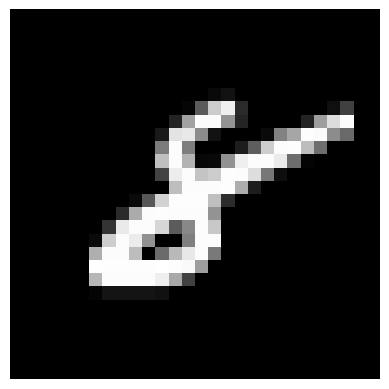

In [ ]:
I = train_X[41495].reshape(28, 28)
plt.imshow(I, cmap='gray', vmin=0, vmax=1)
plt.axis('off');

In [ ]:
def deskew(X):
    # YOUR CODE HERE
    images = np.zeros_like(X)
    for i in range(X.shape[0]):
        
        I = X[i].reshape(28,28)
        img = np.array(I)

        indices = np.argwhere(img > 0.5)
        rr, cc = indices.T

        # Chuẩn hóa tọa độ dòng & cột 
        s_rr = (rr - rr.mean()) / rr.std()
        s_cc = (cc - rr.mean()) / cc.std()

        # Tính hệ số tương quan
        coor_coef = np.mean(s_rr * s_cc)

        # Tính a
        a = (coor_coef * cc.std()) / rr.std()

        # Tính trọng tâm
        s_g = np.mean(indices, axis=0)

        O = np.zeros_like(img)


        for r in range (img.shape[0]):
            for c in range(img.shape[1]):
                ic = c + (s_g[0] - r)*-a
                if(ic > 27):
                    ic = 27
                elif ic < 0:
                    ic = 0
                con = ((np.ceil(ic))-ic)
                O[r,c] = con*img[r, int(np.floor(ic))] + (1 -con)*img[r,int(np.ceil(ic))]


        images[i] = O.flatten()
    return images


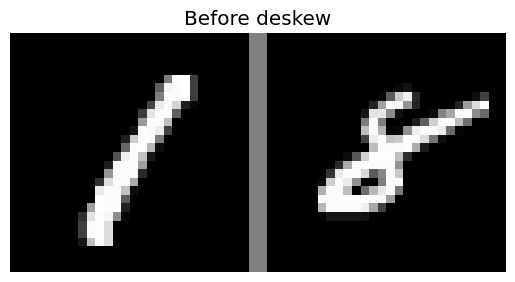

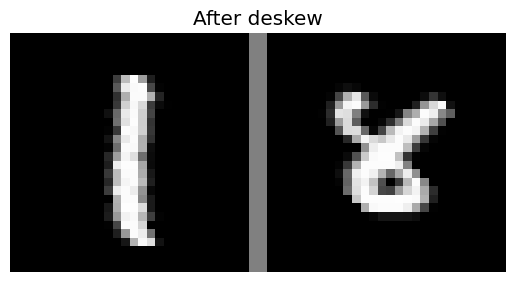

In [ ]:
# TEST
X = train_X[[3, 41495]]
Z = deskew(X)

canvas1 = 0.5 * np.ones((28, 28 + 2 + 28))
canvas1[0:28, 0:28] = X[0].reshape(28, 28)
canvas1[0:28, 28 + 2:28 + 2 + 28] = X[1].reshape(28, 28)
canvas2 = 0.5 * np.ones((28, 28 + 2 + 28))
canvas2[0:28, 0:28] = Z[0].reshape(28, 28)
canvas2[0:28, 28 + 2:28 + 2 + 28] = Z[1].reshape(28, 28)
plt.figure()
plt.imshow(canvas1, cmap='gray', vmin=0, vmax=1)
plt.title('Before deskew')
plt.axis('off')
plt.figure()
plt.imshow(canvas2, cmap='gray', vmin=0, vmax=1)
plt.title('After deskew')
plt.axis('off')

assert Z.shape == (2, 784)
assert str(np.round(Z[0, 152], 4)) == '0.2447'
assert str(np.round(Z[1, 605], 4)) == '0.0578'

Ở trên là ta test nhỏ nhỏ để có thể nhanh chóng kiếm tra tính đúng đắn của hàm `deskew`. Bây giờ, ta mới làm thật: gọi hàm `deskew` rồi gọi tiếp hàm `add_ones` để tiền xử lý `train_X`.

In [ ]:
train_Z = add_ones(deskew(train_X))
train_Z.shape

(50000, 785)

## Tìm mô hình Softmax Regression từ dữ liệu huấn luyện

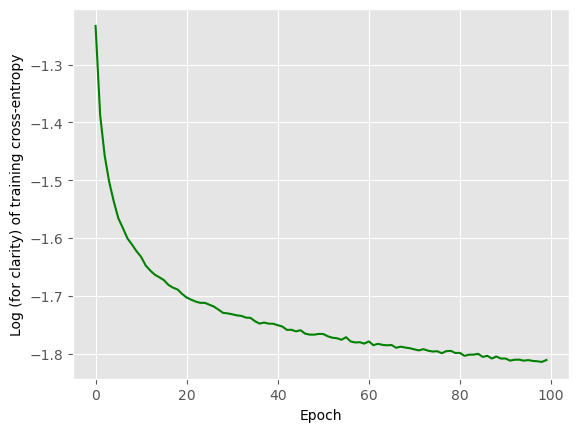

In [ ]:
W_4, train_ces = train_smreg(
    train_Z, train_y, 
    initial_W=None, mb_size=32, lr=0.03, max_epoch=100, wanted_mbe=0)

plt.plot(np.log(train_ces), color='green')
plt.xlabel('Epoch')
plt.ylabel('Log (for clarity) of training cross-entropy');

## Dùng mô hình Softmax Regression tìm được để dự đoán với dữ liệu huấn luyện và đánh giá kết quả

In [ ]:
predicted_train_y = compute_smreg_output(W_4, train_Z, return_prob=False)
train_mbe = compute_mbe(predicted_train_y, train_y)
assert str(np.round(train_mbe, 4)) == '4.7'

AssertionError: 

Độ lỗi MBE trên dữ liệu huấn luyện giảm từ 6.x% xuống 4.x%! Xuất sắc!

## Tiền xử lý dữ liệu validation, dùng mô hình Softmax Regression tìm được để dự đoán với dữ liệu validation và đánh giá kết quả

In [ ]:
val_Z = add_ones(deskew(val_X))
predicted_val_y = compute_smreg_output(W_4, val_Z, return_prob=False)
val_mbe = compute_mbe(predicted_val_y, val_y)
assert str(np.round(val_mbe, 4)) == '4.7'

AssertionError: 

Độ lỗi MBE trên dữ liệu validation cũng giảm theo: từ 7.x% xuống 4.x%! Thật sự xuất sắc!

## Chọn ra cách tiền xử lý + mô hình Softmax Regression sau cùng là cách tiền xử lý + mô hình Softmax Regression mà có độ lỗi dự đoán thấp nhất trên dữ liệu validation

Như vậy, ta sẽ chọn cách tiền xử lý `add_ones(deskew(...))` và mô hình SoftmaxRegression có bộ trọng số `W_4`.

## Dùng cách tiền xử lý + mô hình Softmax Regression sau cùng để đi thi thật!

In [ ]:
test_Z = add_ones(deskew(test_X))
predicted_test_y = compute_smreg_output(W_4, test_Z, return_prob=False)
test_mbe = compute_mbe(predicted_test_y, test_y)
assert str(np.round(test_mbe, 4)) == '5.13'

AssertionError: 